In [0]:
pip install wordcloud

Python interpreter will be restarted.
  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-af5c9f7b-80c1-4098-ad3a-248573dab307/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install mlxtend

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-af5c9f7b-80c1-4098-ad3a-248573dab307/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
DF = (spark.read
      .option("inferSchema", True)
      .json("/FileStore/tables/Project_Data_Extract/Reviews_Final.json"))
#spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
reviews_pdf=DF.toPandas()
reviews_pdf.head()

,Aspect,Aspect Keywords,Aspect Sentiment,Emotion,Food_Entities,Overall Aspect,business_id,cool,date,dominant_topic,dominant_topic_theme,funny,month,personality,sentiment,sentiment_score,stars,text_syntatics_cleaned,useful
0,"[FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALIT...","[grubhub order sent chopstick soy sauce, would...","[neutral, neutral, neutral, negative, negative...",anger,[chopstick soy sauce],RESTAURANT#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,3/7/2019,3,Food Ordering/Food(chicken/sauce)/Service/Temp...,1,3,ISTJ,negative,-0.7506,1,ordered grubhubstaying hotel indicated order s...,0
1,"[RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIE...","[pleasant surprise, burn time, planned great a...","[positive, neutral, positive, positive, positive]",joy,[],SERVICE#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,2/15/2019,17,Customer Service/Food/Drinks/Environment(clean...,0,2,ISTP,positive,0.9694,5,pleasant surprise whatever stopped ra burn tim...,0
2,"[SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURA...","[always super, clean come time, always good, e...","[positive, positive, positive, neutral, neutra...",joy,[food yummy hater],FOOD#QUALITY,dZh2u96vAN8pdHmiwcpXdw,0,3/22/2019,17,Customer Service/Food/Drinks/Environment(clean...,0,3,INTJ,positive,0.9842,5,love place atmosphere nice always super clean ...,0
3,"[RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY]","[avocadofresh rice, loose small, portion roll ...","[positive, negative, neutral]",fear,[miso soup flavor tofu],FOOD#QUALITY,dZh2u96vAN8pdHmiwcpXdw,0,2/23/2019,16,Food(Roll/sushi/spicy/fried rice/shrimp/chicken),0,2,ISTP,neutral,0.0000,1,fish avocadofresh riceloose small portion roll...,1
4,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[experience meal, card split bill couple minut...","[neutral, neutral, negative, neutral, neutral,...",joy,[],SERVICE#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,3/17/2019,15,Payment(Comped),0,3,ISTJ,positive,0.6249,2,girlfriend came two week ago quite experience ...,3


In [0]:
reviews_pdf['Food_Entities'].iloc[:1][0]

Out[17]: '[chopstick soy sauce]'

In [0]:
reviews_pdf['Food_Entities']=reviews_pdf["Food_Entities"].str.replace(r'[^\w\s]+', '')

<command-1684511256259351>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_pdf['Food_Entities']=reviews_pdf["Food_Entities"].str.replace(r'[^\w\s]+', '')


In [0]:
def clean_food(food):
    food=food.strip('][').split(',')
    return food[0].split()
    
reviews_pdf['Food_Entities']=reviews_pdf["Food_Entities"].apply(clean_food)
reviews_pdf

,Aspect,Aspect Keywords,Aspect Sentiment,Emotion,Food_Entities,Overall Aspect,business_id,cool,date,dominant_topic,dominant_topic_theme,funny,month,personality,sentiment,sentiment_score,stars,text_syntatics_cleaned,useful
0,"[FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALIT...","[grubhub order sent chopstick soy sauce, would...","[neutral, neutral, neutral, negative, negative...",anger,"[chopstick, soy, sauce]",RESTAURANT#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,3/7/2019,3,Food Ordering/Food(chicken/sauce)/Service/Temp...,1,3,ISTJ,negative,-0.7506,1,ordered grubhubstaying hotel indicated order s...,0
1,"[RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIE...","[pleasant surprise, burn time, planned great a...","[positive, neutral, positive, positive, positive]",joy,[],SERVICE#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,2/15/2019,17,Customer Service/Food/Drinks/Environment(clean...,0,2,ISTP,positive,0.9694,5,pleasant surprise whatever stopped ra burn tim...,0
2,"[SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURA...","[always super, clean come time, always good, e...","[positive, positive, positive, neutral, neutra...",joy,"[food, yummy, hater]",FOOD#QUALITY,dZh2u96vAN8pdHmiwcpXdw,0,3/22/2019,17,Customer Service/Food/Drinks/Environment(clean...,0,3,INTJ,positive,0.9842,5,love place atmosphere nice always super clean ...,0
3,"[RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY]","[avocadofresh rice, loose small, portion roll ...","[positive, negative, neutral]",fear,"[miso, soup, flavor, tofu]",FOOD#QUALITY,dZh2u96vAN8pdHmiwcpXdw,0,2/23/2019,16,Food(Roll/sushi/spicy/fried rice/shrimp/chicken),0,2,ISTP,neutral,0.0000,1,fish avocadofresh riceloose small portion roll...,1
4,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[experience meal, card split bill couple minut...","[neutral, neutral, negative, neutral, neutral,...",joy,[],SERVICE#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,3/17/2019,15,Payment(Comped),0,3,ISTJ,positive,0.6249,2,girlfriend came two week ago quite experience ...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,"[FOOD#QUALITY, FOOD#STYLE_OPTIONS, FOOD#QUALIT...","[roll goyoza oz rice, tiny roll, taste old man...","[neutral, neutral, neutral, neutral, neutral, ...",sadness,"[roll, goyoza, oz, rice, roll, sauce]",SERVICE#GENERAL,s7baMoiG1821_3NblCfK6w,0,10/4/2020,3,Food Ordering/Food(chicken/sauce)/Service/Temp...,0,10,ISTJ,negative,-0.7514,1,terrible ordered roll goyoza oz rice got tiny ...,0
437,"[RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#...","[least time, must say, sushi ok host, rude ser...","[neutral, neutral, positive, negative, neutral...",anger,[],SERVICE#GENERAL,s7baMoiG1821_3NblCfK6w,0,11/1/2020,17,Customer Service/Food/Drinks/Environment(clean...,0,11,ISTP,positive,0.3535,2,whatever least time must say sushi ok host sta...,0
438,"[SERVICE#GENERAL, SERVICE#GENERAL, SERVICE#GEN...","[table reservation, minute service, server nev...","[neutral, neutral, neutral, neutral, neutral, ...",sadness,[],SERVICE#GENERAL,s7baMoiG1821_3NblCfK6w,0,10/25/2020,18,Environment(decor/patio/lighting)/Music,0,10,ISFP,negative,-0.5118,2,whatever sorry_about_that table reservation wa...,0
439,"[RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#...","[place dozen time, really great, experience gr...","[neutral, positive, positive, neutral, neutral...",joy,[],RESTAURANT#GENERAL,s7baMoiG1821_3NblCfK6w,0,11/9/2020,16,Food(Roll/sushi/spicy/fried rice/shrimp/chicken),0,11,ISFP,positive,0.8856,5,I visited place dozen time past year I really ...,0


In [0]:
reviews_pdf['Food_Entities'].iloc[:1][0]

Out[19]: ['chopstick', 'soy', 'sauce']

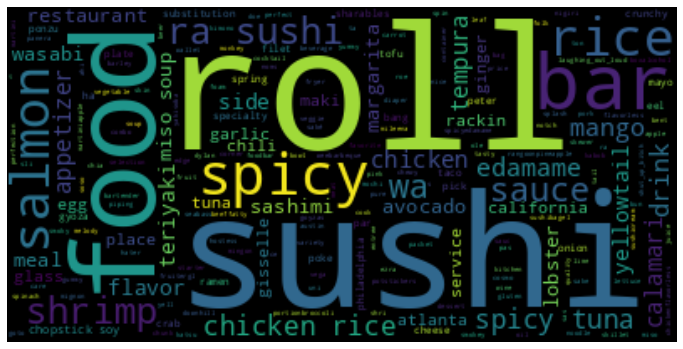

In [0]:
import matplotlib.pyplot as plt
text = reviews_pdf['Food_Entities'].to_string()

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(12,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [0]:
print(wordcloud.words_.keys())

dict_keys(['roll', 'sushi', 'food', 'bar', 'spicy', 'salmon', 'rice', 'shrimp', 'ra sushi', 'sauce', 'wa', 'spicy tuna', 'chicken rice', 'edamame', 'drink', 'mango', 'chicken', 'appetizer', 'tempura', 'calamari', 'flavor', 'teriyaki', 'yellowtail', 'side', 'avocado', 'sashimi', 'restaurant', 'meal', 'wasabi', 'margarita', 'lobster', 'miso soup', 'garlic', 'rackin', 'ginger', 'maki', 'tuna', 'glass', 'california', 'service', 'atlanta', 'place', 'chili', 'egg', 'gisselle', 'chopstick soy', 'tofu', 'gyoza', 'ramen', 'specialty', 'philadelphia', 'cheese', 'substitution', 'poke', 'taco', 'sharables', 'ha', 'filet', 'crunchy', 'mayo', 'eel', 'onion', 'plate', 'spring', 'pick', 'ponzu', 'bang', 'crab', 'par', 'peter', 'yummy', 'hater', 'miso', 'soup', 'pork', 'veggie', 'melody', 'noodle', 'nigiri', 'variety', 'rangoonpineapple', 'shri', 'laughing_out_loud', 'goyzas', 'nice', 'seabass', 'potstickers', 'ra', 'wallet', 'diaper', 'tail', 'kitchen', 'skillet', 'cook', 'chia', 'dylan', 'bartender',

In [0]:
dataset=reviews_pdf["Food_Entities"].tolist()

In [0]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)

In [0]:
df=pd.DataFrame(te_ary,columns=te.columns_)
df

,ahi,appetizer,apple,assortment,atlanta,austin,avocado,bag,bang,bar,...,wa,wallet,wasabi,water,weebarbeque,weird,wine,yakisoba,yellowtail,yummy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [0]:
df.replace({False:0,True:1},inplace=True)

In [0]:
#Enter your codes here to generate the frequent itemset using mlxtend
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
print(frequent_itemsets)

      support                      itemsets
0    0.013605                   (appetizer)
1    0.006803                     (atlanta)
2    0.009070                     (avocado)
3    0.038549                         (bar)
4    0.015873                    (calamari)
..        ...                           ...
118  0.006803         (shrimp, spicy, tuna)
119  0.006803      (sushi, tempura, shrimp)
120  0.009070  (chicken, rice, roll, spicy)
121  0.009070  (sushi, salmon, roll, spicy)
122  0.006803   (shrimp, spicy, roll, tuna)

[123 rows x 2 columns]


In [0]:
#Enter your codes here to generate rules from the frequent itemsets
from mlxtend.frequent_patterns import association_rules
print(association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7))


              antecedents     consequents  antecedent support  \
0               (atlanta)         (sushi)            0.006803   
1               (avocado)          (roll)            0.009070   
2            (california)          (roll)            0.006803   
3                 (chili)          (roll)            0.006803   
4             (chopstick)           (soy)            0.006803   
..                    ...             ...                 ...   
59         (sushi, spicy)  (salmon, roll)            0.009070   
60        (salmon, spicy)   (sushi, roll)            0.011338   
61  (shrimp, spicy, tuna)          (roll)            0.006803   
62   (shrimp, roll, tuna)         (spicy)            0.006803   
63         (shrimp, tuna)   (spicy, roll)            0.006803   

    consequent support   support  confidence        lift  leverage  conviction  
0             0.133787  0.006803        1.00    7.474576  0.005893         inf  
1             0.117914  0.006803        0.75    6.360577 